# Figure 5: Compare Repro with PB for hypothesis testing on the slope in linear regression with different levels of the true slope

In [9]:
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import CenteredNorm

In [10]:
def transform_data(gdp):
    gdp = str(gdp)
    sample_size_list = []
    beta1_list = []
    rejection_prob_list = []
    method_list = []
    method_dict = {'PB':'PB (Naïve estimator + F-statistic)', 'Repro':'Repro', 'IN':'PB (Indirect estimator + F-statistic)', 'INT':'PB (Indirect estimator + approximate-pivot)'}
    
    for method in method_dict:
        csv_path = './results/' + method + '.csv'
        dataset = pd.read_csv(csv_path)
        for i in range(dataset.shape[0]):
            for j in range(dataset.shape[1]):
                sample_size = dataset.columns[j]
                beta1 = dataset.index[i]
                rejection_prob = dataset[sample_size][beta1]

                sample_size_list.append(int(sample_size))
                beta1_list.append((beta1))
                rejection_prob_list.append(round(rejection_prob, 3))
                method_list.append(method_dict[method])
            
    # dataset = pd.DataFrame(np.array([sample_size_list, beta1_list, rejection_prob_list, method_list]).transpose(),
                   # columns=['sample_size', 'beta1', 'rejection_prob', 'method'])
            
    dataset = pd.DataFrame({'sample_size': sample_size_list, 
                           'beta1': beta1_list, 
                           'rejection_prob': rejection_prob_list,
                           'method': method_list})
    return dataset
    # return dataset.pivot('sample_size', 'beta1', 'rejection_prob')
gdp1_data = transform_data(1)

/Users/wang4094/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


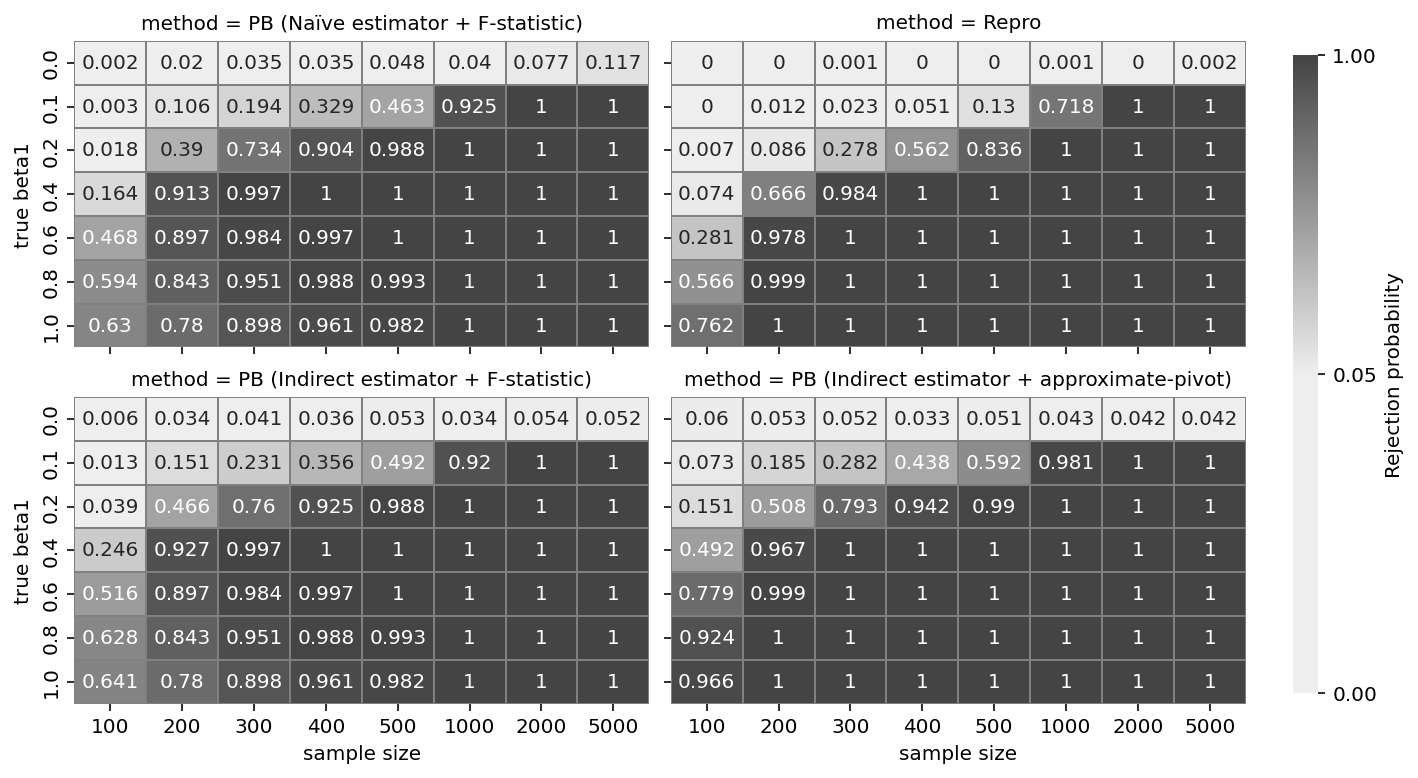

In [11]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    # if (list(data['method'])[0] != 'Repro'):
    ax = sns.heatmap(d, **kwargs, linewidths=1, fmt='g', linecolor='grey')
    
# fg = sns.FacetGrid(gdp1_data, col='method', height=2, aspect=1.8, col_wrap=2)
# fg = sns.FacetGrid(gdp1_data, col='method', height=4.16/1.5, aspect=1.5, col_wrap=2)
fg = sns.FacetGrid(gdp1_data, col='method', height=2.77, aspect=1.6, col_wrap=2)

# rdgn = sns.color_palette("blend:#ffffff,#ffffff,#a1c9f4", as_cmap=True)
rdgn = sns.color_palette("blend:#eeeeee,#eeeeee,#444444", as_cmap=True)
divnorm = TwoSlopeNorm(vmin=0, vcenter=0.05, vmax=1)

cax = fg.fig.add_axes([1.02, .12, .02, .8])
fg.map_dataframe(draw_heatmap, 'sample_size', 'beta1', 'rejection_prob', 
                 annot=True, 
                 cbar_ax=cax,
                 cbar_kws={'label': 'Rejection probability', 
                           "ticks":[0, 0.05,1]}, 
                 cmap=rdgn, norm=divnorm) 
fg.set(xlabel='sample size', ylabel='true beta1')

plt.savefig('LR_HT_gdp=1.pdf', bbox_extra_artists=(cax,),  bbox_inches='tight')